Importing Datasets

In [2]:
import numpy as np
import pandas as pd

# Defining the file path of the dataset
file_path_tr = 'Train-AP.csv'
file_path_ts = 'Test-Ap.csv'

# Read the train dataset
df = pd.read_csv(file_path_tr)

# Read the test dataset
df_test = pd.read_csv(file_path_ts)

# Displaying the first few rows of the dataset
print(df.head())

  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            May-21          10.16  
1       Powder            Oct-20         134.28  
2       Powder            Dec-20          12.46  
3       Powder            Feb-21         107.22  
4       Liquid            Nov-20         197.76  


Preprocessing of Training Dataset

In [3]:
print(df.head()) 
print(df.info())  
print(df.describe())  

  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            May-21          10.16  
1       Powder            Oct-20         134.28  
2       Powder            Dec-20          12.46  
3       Powder            Feb-21         107.22  
4       Liquid            Nov-20         197.76  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer     

In [12]:
#Removing the Negative values in the dataset

mean_sourcing_cost = df['Sourcing Cost'].mean()
df['Sourcing Cost'] = df['Sourcing Cost'].apply(lambda x: max(0, x) if x < 0 else x)
print(df.describe())

         ProductType   Manufacturer      Area Code  Sourcing Channel  \
count  533746.000000  533746.000000  533746.000000     533746.000000   
mean        0.828276       0.226104      22.804118          0.246885   
std         0.727100       0.418308      14.384537          0.612000   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000      11.000000          0.000000   
50%         1.000000       0.000000      21.000000          0.000000   
75%         1.000000       0.000000      37.000000          0.000000   
max         2.000000       1.000000      44.000000          2.000000   

        Product Size   Product Type  Month of Sourcing  Sourcing Cost  
count  533746.000000  533746.000000      533746.000000  533746.000000  
mean        1.397045       0.853211           5.029495       0.258551  
std         0.504125       0.353896           3.120337       0.136492  
min         0.000000       0.000000           0.000000       0.

In [13]:
# Conversion of Categorical Values into Numeric & Performing One Hot Encoding

categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols)


In [14]:
#Filling the missing values and Encoding via Label Encoder

from sklearn.preprocessing import LabelEncoder

numerical_cols = df.select_dtypes(include=['int', 'float']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])



In [15]:
# Calculate Z-score for each numerical column to Remove outliers

z_scores = (df - df.mean()) / df.std()
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]


In [16]:
# Min- Max Scaling for the better training

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
target_feature = df['Sourcing Cost'].values.reshape(-1, 1)
scaled_target_feature = scaler.fit_transform(target_feature)
df['Sourcing Cost'] = scaled_target_feature.flatten()

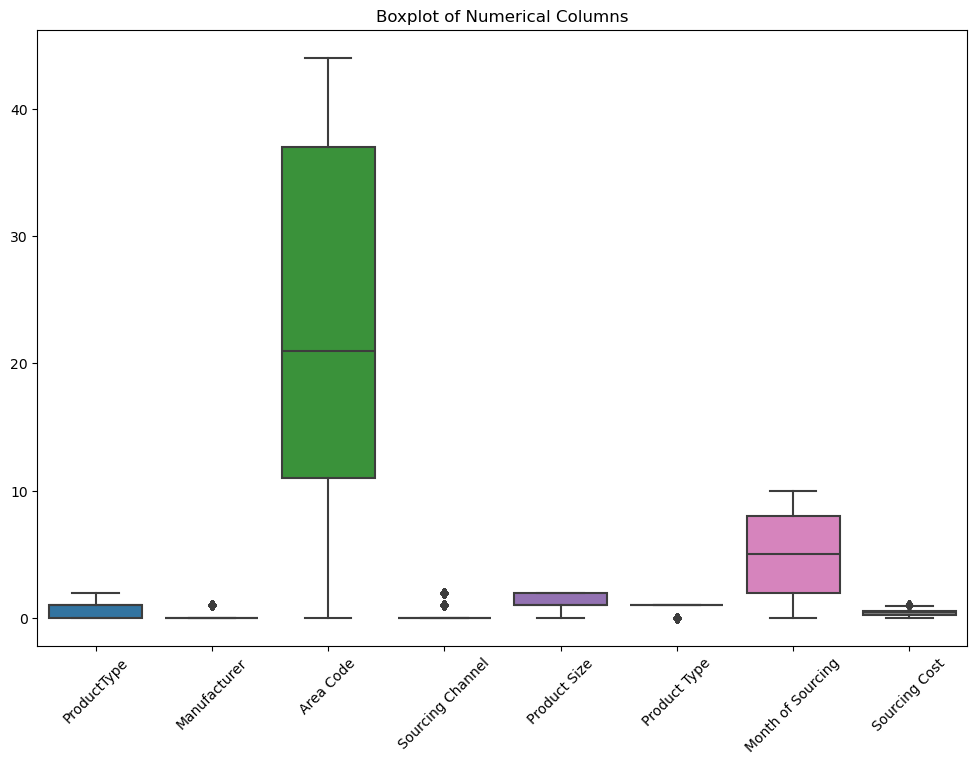

<Figure size 1200x800 with 0 Axes>

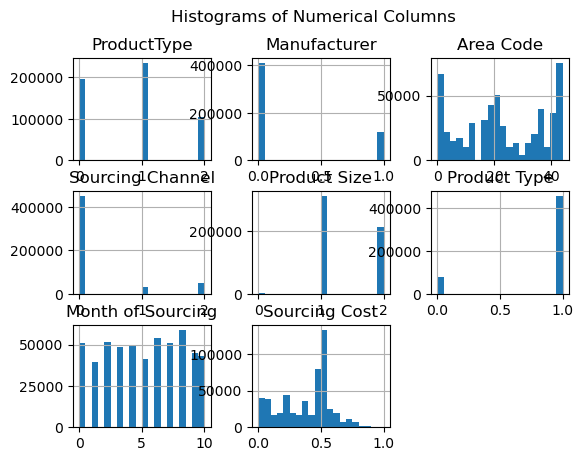

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for numerical columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['int', 'float']))
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

# Plotting histograms for numerical columns to visualize distribution
plt.figure(figsize=(12, 8))
df.select_dtypes(include=['int', 'float']).hist(bins=20)
plt.suptitle('Histograms of Numerical Columns')
plt.show()


Preprocessing of Test Dataset

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

print(df_test.head())  
print(df_test.info())  
print(df_test.describe()) 

scaler = MinMaxScaler()
target_feature = df_test['Sourcing Cost'].values.reshape(-1, 1)
scaled_target_feature = scaler.fit_transform(target_feature)
df_test['Sourcing Cost'] = scaled_target_feature.flatten()

categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']
df_encoded = pd.get_dummies(df_test, columns=categorical_cols)
print(df_encoded.head())

numerical_cols = df_test.select_dtypes(include=['int', 'float']).columns
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].mean())
categorical_cols = df_test.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

label_encoder = LabelEncoder()
for col in categorical_cols:
    df_test[col] = label_encoder.fit_transform(df_test[col])




   ProductType  Manufacturer  Area Code  Sourcing Channel  Product Size  \
0            0             0          0                 0             2   
1            0             0          1                 0             1   
2            0             0          1                 1             1   
3            0             0          2                 0             1   
4            0             0         11                 0             1   

   Product Type  Sourcing Cost  
0             1       0.431713  
1             1       0.657544  
2             1       0.602333  
3             1       0.586590  
4             1       0.716832  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductType       96 non-null     int32  
 1   Manufacturer      96 non-null     int32  
 2   Area Code         96 non-null     int32  
 3   Sourcing 

Checking which Models can be used

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.datasets import make_regression

X = df.drop(columns=['Sourcing Cost','Month of Sourcing'])
y = df['Sourcing Cost']


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

r2_scorer = make_scorer(r2_score)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=r2_scorer)
    print(f"{name}: Mean R2 Score: {scores.mean()}, Std R2 Score: {scores.std()}")


Linear Regression: Mean R2 Score: 0.26501803976195343, Std R2 Score: 0.16060222567440294
Random Forest: Mean R2 Score: 0.8263076180823326, Std R2 Score: 0.0028759222943745924
Gradient Boosting: Mean R2 Score: 0.7758506041402018, Std R2 Score: 0.029655439437754862
XGBoost: Mean R2 Score: 0.8263028702365667, Std R2 Score: 0.0028723944434577917


Building of Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = df.drop(columns=['Sourcing Cost','Month of Sourcing'])
y = df['Sourcing Cost']

rf_model = RandomForestRegressor( random_state=42)
rf_model.fit(X, y)

X_test=df_test.drop(columns=['Sourcing Cost'])
y_test = df_test['Sourcing Cost']

y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred_rf)
print("R-squared (R2) score:", r2)


Mean Squared Error: 0.021033029557146466
R-squared (R2) score: 0.5878414188131542


Building Gradient Boosting Model 

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

X = df.drop(columns=['Sourcing Cost','Month of Sourcing'])
y = df['Sourcing Cost']

gb_model = GradientBoostingRegressor( random_state=42)
gb_model.fit(X, y)

y_pred_gb = gb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred_gb)

print("R-squared (R2) score:", r2)

Mean Squared Error: 0.02080397696263382
R-squared (R2) score: 0.5923298826416767


Buiding XG Boost Model

In [22]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor( random_state=42)
xgb_model.fit(X, y)

y_pred_xgb = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred_xgb)

print("R-squared (R2) score:", r2)


R-squared (R2) score: 0.5916483904261001


Combining the Model's Prediction using the Weighted Approach 

In [39]:
r=0.2
g=0.4
xgb=0.4

y_pred_combined = ( y_pred_rf*r + y_pred_gb*g+y_pred_xgb*xgb)

r2 = r2_score(y_test, y_pred_combined)

print("R-squared (R2) score:", r2)


R-squared (R2) score: 0.6103240025221848
